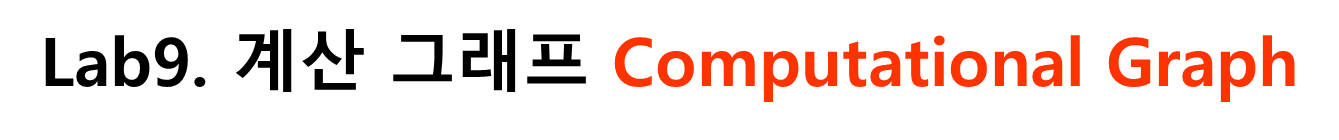

  * 역전파(backward propagation)는 결과와 정답의 차이로 계산된 손실(loss)을 연쇄법(chain rule)을 이용해 입력단까지 다시 전달하는 과정입니다.
  * 계산 그래프 : 노드가 수학 연산에 해당하는 방향 그래프(directed graph)로 정의되는 수학적 표현 방법입니다.  
  
####  참고 : http://cs231n.github.io/optimization-2
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(한글) https://ratsgo.github.io/deep%20learning/2017/05/14/backprop/

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

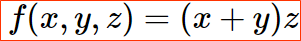
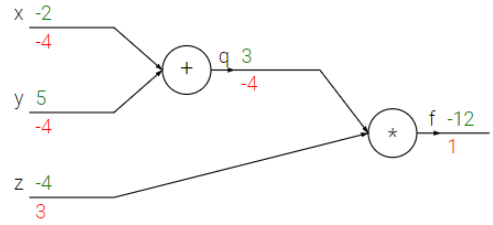

In [2]:
# set some inputs
x = -2; y = 5; z = -4

# perform the forward pass
q = x + y # q becomes 3
f = q * z # f becomes -12

# perform the backword
# first backprop through f = q * z
dfdz = q # df/dz = q, so gradient on z becomes 3
dfdq = z # df/dq = z, so gradient on q becomes -4
# now backprop through q = x + y
dfdx = 1.0 * dfdq # dq/dx = 1, And the multiplication here is the chain rule!
dfdy = 1.0 * dfdq # dq/dy = 1

print('q =', q)
print('f =', f)
print('dfdq =', dfdq)
print('dfdx =', dfdx)
print('dfdy =', dfdy)
print('dfdz =', dfdz)

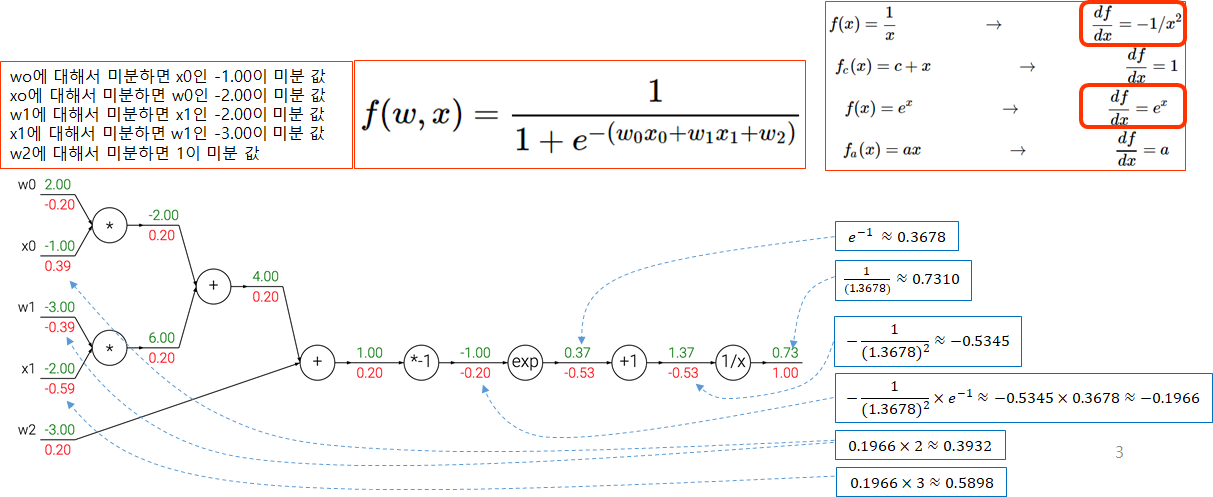

In [3]:
import math
w = [2, -3, -3] # assume some random weights and data
x = [-1, -2]

# forward pass
dot = w[0]*x[0] + w[1]*x[1] + w[2]
f = 1.0 / (1 + math.exp(-dot)) # sigmoid function
print(dot)
print(f)

# backward pass through the neuron (backpropagation)
ddot = (1 - f) * f # gradient on dot variable, using the sigmoid gradient derivation
dx = [w[0] * ddot, w[1] * ddot] # backprop into x
dw = [x[0] * ddot, x[1] * ddot, 1.0 * ddot] # backprop into w
# we're done! we have the gradients on the inputs to the circuit
print(ddot)
print(dx)
print(dw)

### (참고) sigmoid function σ(x) 미분 증명
  * 분자에 1을 더해주고 다시 빼주는 트릭으로 미분을 단순화 합니다.
  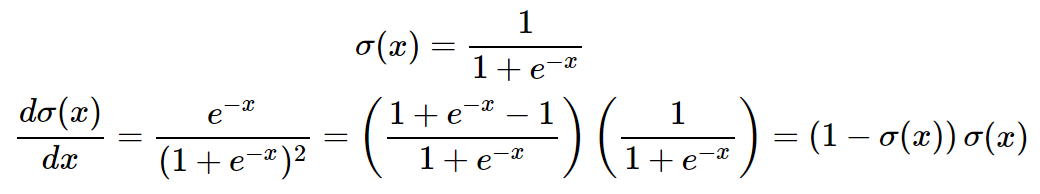

### (참고) 지수함수의 미분 증명
  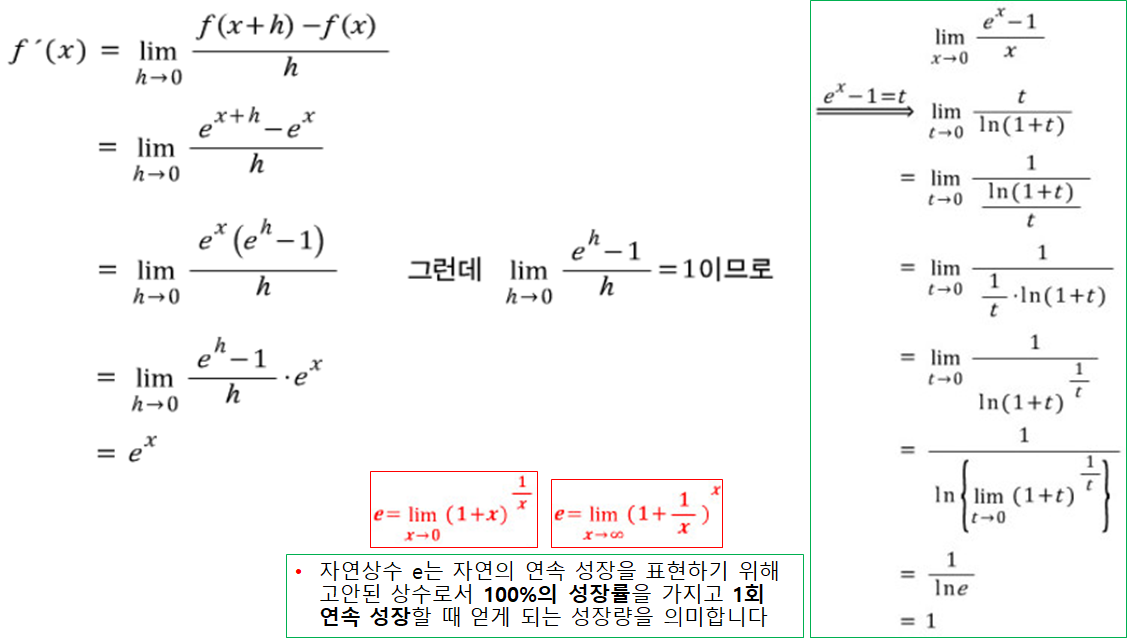

## (Lab9)
  * 단순식과 경사 해석 (Simple exprssions and interpretation of the gradient)
    1. f(x, y) = xy (x = 4, y = -3인 경우)
    2. f(x, y) = x + y (x = 4, y = -3인 경우)
    3. f(x, y) = max(x, y) (x = 4, y = 2인 경우)

In [4]:
# 1.

# set some inputs
x = 4; y = -3

# perform the forward pass
f = x * y

# perfrom the backward pass
dfdx = y
dfdy = x

print('dfdx =', dfdx)
print('dfdy =', dfdy)

In [5]:
# 2.

# set some inputs
x = 4; y = -3

# perform the forward pass
f = x + y

# perfrom the backward pass
dfdx = 1
dfdy = 1

print('dfdx =', dfdx)
print('dfdy =', dfdy)

In [6]:
# 3.

# set some inputs
x = 4; y = 2

# perform the forward pass
f = max(x, y)

# perfrom the backward pass
dfdx = (1 if x >= y else 0)
dfdy = (1 if y >= x else 0)

print('dfdx =', dfdx)
print('dfdy =', dfdy)